In [16]:
import re
import os
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
from random import randint
from matplotlib.ticker import MaxNLocator
from functools import partial
import pickle

from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse

import nltk
from nltk.stem import PorterStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [17]:
class DataLake:
    
    path = 'features/'
    
    def __init__(self, version):
        self.version = version 
        self.version_path = self.path + version + "/"
        
        #create version folder if not exists
        if not os.path.exists(self.path + self.version):
            try:
                os.makedirs(self.path + self.version)
            except OSError as e:
                if e.errno != errno.EEXIST:
                    raise
    
    def load_npz(self, file_name):
        return sparse.load_npz(self.version_path + file_name)
    
    def load_obj(self, obj_name):
        with open(self.version_path + obj_name, 'rb') as input:
            return pickle.load(input)
        
data_lake = DataLake(version='v3')

In [18]:
def load_feature(feature):
    df_[feature] = data_lake.load_obj(feature + '.pkl')

In [19]:
df_train_table = pd.read_csv('dataset/train_set.csv')
df_train_table.index = df_train_table.pk_id
del df_train_table['pk_id']

df_test_table = pd.read_csv('dataset/test_set.csv')
df_test_table.index = df_test_table.pk_id
del df_test_table['pk_id']

df = df_train_table.append(df_test_table, sort=False)

In [20]:
print(df.head())
print()
print(df.describe())

         category file_type master_tree
pk_id                                  
7458273        RL       htm     CORRESP
17561810       UU       htm     CORRESP
7859969        RL       htm     CORRESP
13471870       AR       htm     CORRESP
7847948        AR       htm     CORRESP

       category file_type master_tree
count     55556     55556       55556
unique       11         3           2
top          RL       htm     CORRESP
freq      21246     25911       29012


In [21]:
"""distribucion de las categorias

dataframe con el tipo de categoria, la cantidad de cartas por cada categoria, 
el porcentaje que representan sobre el total de cartas

- eje X: categoria
- eje Y: porcentaje que representa la categoria (0% a 100%)"""

'distribucion de las categorias\n\ndataframe con el tipo de categoria, la cantidad de cartas por cada categoria, \nel porcentaje que representan sobre el total de cartas\n\n- eje X: categoria\n- eje Y: porcentaje que representa la categoria (0% a 100%)'

In [22]:
df_ = round(df.groupby('category').category.count() / len(df) * 100, 2)
df_ = pd.DataFrame(df_)
df_.columns = ['percentage']
df_['count'] = df.groupby('category').category.count()

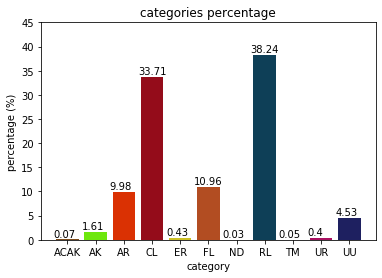

In [23]:
y = df_.percentage
x = df_.index

colors = []
for i in range(len(x)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
plt.bar(x, y, color=colors)    
plt.xlabel('category')
plt.ylabel('percentage (%)')
plt.title('categories percentage')

xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.5, v + 0.5, str(v))
    
axes = plt.gca()
axes.set_ylim([0,45])

plt.show()

In [24]:
"""distribution de la longitud de las cartas

data frame que contenga el id y la longitud del doc en caracteres.

grafico de la distribucion de las cartas, 
- eje X: la cantidad de caracteres agrupados por rango.
- eje Y: la cantidad de cartas que se corresponden a un rango."""

'distribution de la longitud de las cartas\n\ndata frame que contenga el id y la longitud del doc en caracteres.\n\ngrafico de la distribucion de las cartas, \n- eje X: la cantidad de caracteres agrupados por rango.\n- eje Y: la cantidad de cartas que se corresponden a un rango.'

In [25]:
df_train_table_ = df_train_table.copy()
df_train_table_['path'] = 'dataset/train_set/'

df_test_table_ = df_test_table.copy()
df_test_table_['path'] = 'dataset/test_set/'

df_ = df_train_table_.append(df_test_table_, sort=False)

del df_['master_tree']

In [27]:
load_feature('letter_lenght')

load_feature('word_count')

load_feature('word_density')

Text(0.5, 1.0, 'letter_lenght distribution')

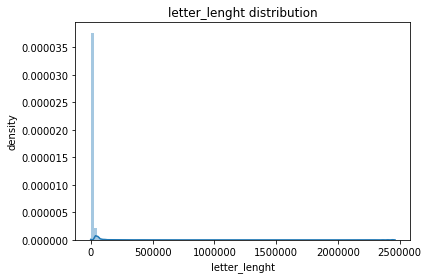

In [28]:
sns.distplot(df_.letter_lenght, bins = 100)
plt.ylabel('density')
plt.title('letter_lenght distribution')

Text(0.5, 1.0, 'letter_lenght distribution')

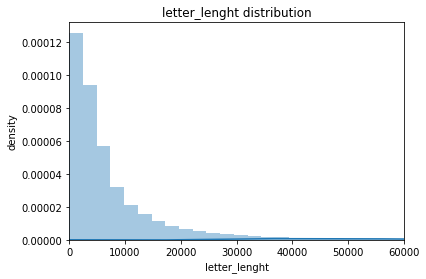

In [29]:
sns.distplot(df_.letter_lenght, bins = 1000)
plt.xlim(0, 60000)
plt.ylabel('density')
plt.title('letter_lenght distribution')

In [30]:
threshold = 40000
msg = "df_.letter_lenght > " + str(threshold) + " =>"
print(msg, round(len(df_[df_.letter_lenght > threshold]) / len(df_) * 100, 2))
print(msg, df_[df_.letter_lenght > threshold].category.unique())

df_.letter_lenght > 40000 => 3.18
df_.letter_lenght > 40000 => ['RL' 'CL' 'UU']


In [31]:
""" features vs categorias

ya se dispone del dataframe y sus features intrínsecas.

grafico de como se distribuye cada feature intrinseca por cada categoria.
Las features intrinsics son:
- extension type (categorica)
- longitud de cartas (numerica)

========================================
en caso de longitud de cartas:
- eje X: la cantidad de caracteres agrupados por rango por categoria.
- eje Y: la cantidad de cartas que se corresponden a un rango.
( se tendrá un grafico por cada categoria, pueden estar superpuestos )
"""

' features vs categorias\n\nya se dispone del dataframe y sus features intrínsecas.\n\ngrafico de como se distribuye cada feature intrinseca por cada categoria.\nLas features intrinsics son:\n- extension type (categorica)\n- longitud de cartas (numerica)\n\n========================================\nen caso de longitud de cartas:\n- eje X: la cantidad de caracteres agrupados por rango por categoria.\n- eje Y: la cantidad de cartas que se corresponden a un rango.\n( se tendrá un grafico por cada categoria, pueden estar superpuestos )\n'

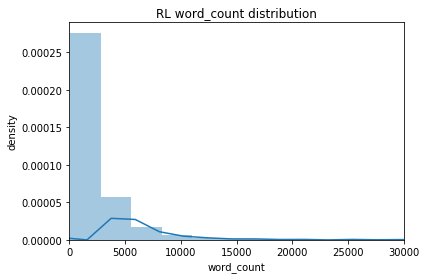

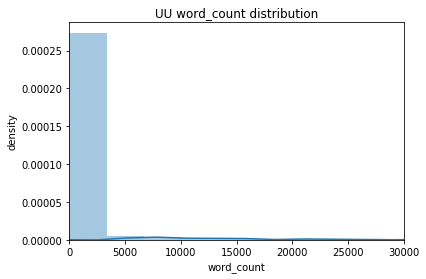

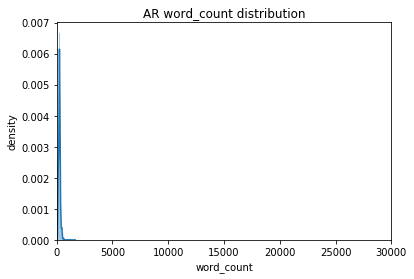

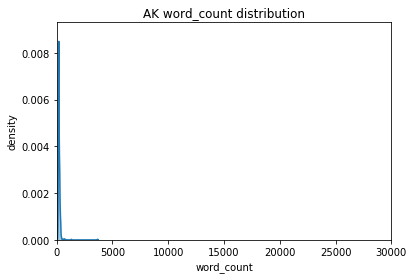

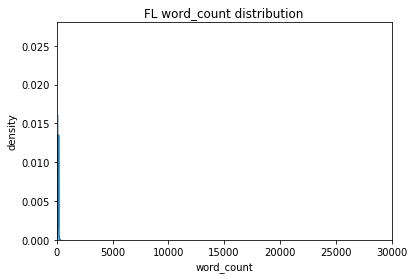

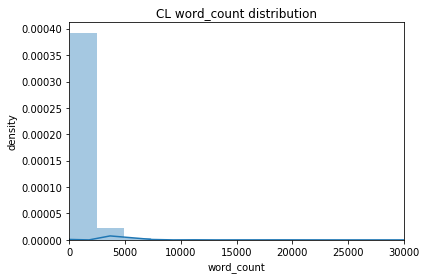

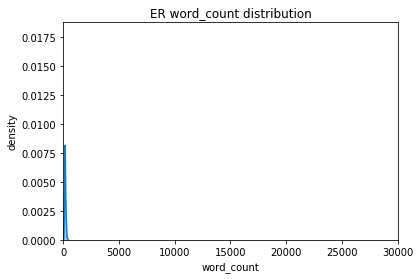

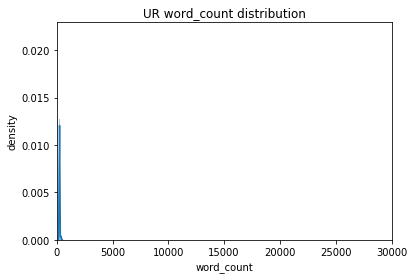

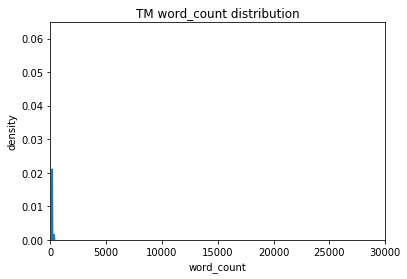

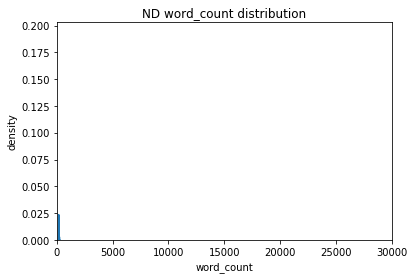

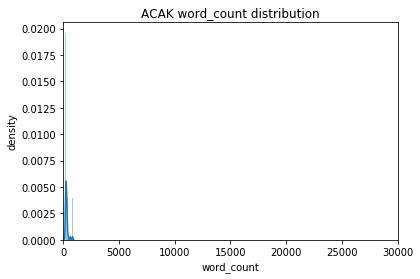

In [32]:
for i, category in enumerate(df_.category.unique()):
    _ = plt.figure(i)
    
    df_category = df_[df_.category == category]
    sns.distplot(df_category.word_count, bins = 100)
    plt.xlim(0, 30000)#df_category.letter_lenght.max())
    plt.ylabel('density')
    plt.title(category + ' word_count distribution')
    
plt.show()

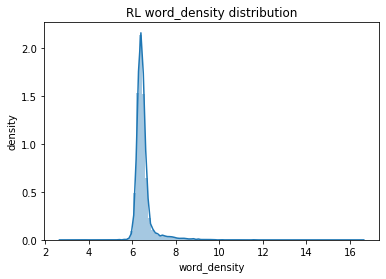

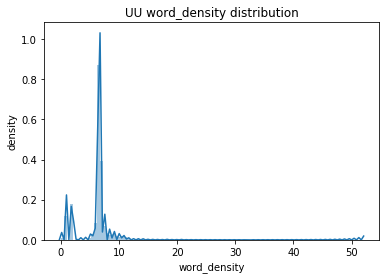

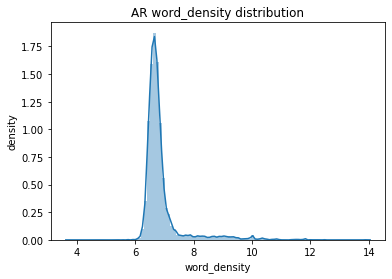

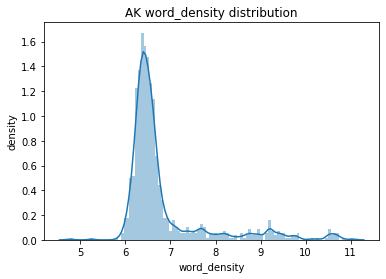

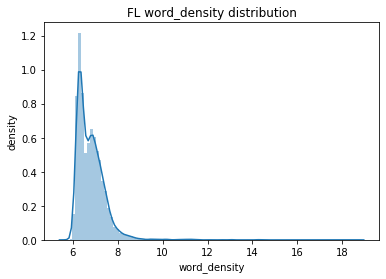

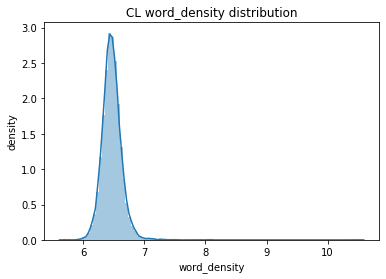

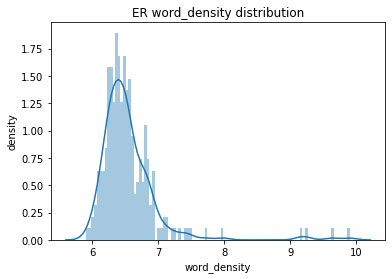

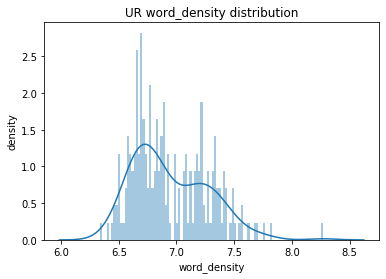

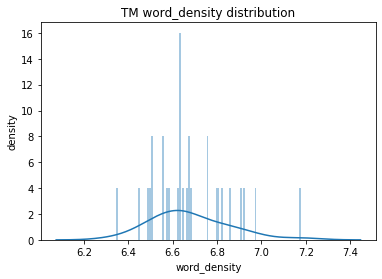

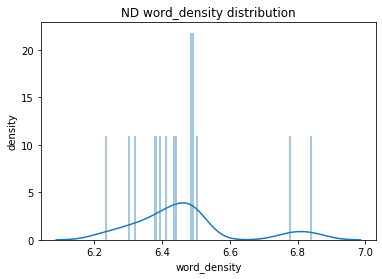

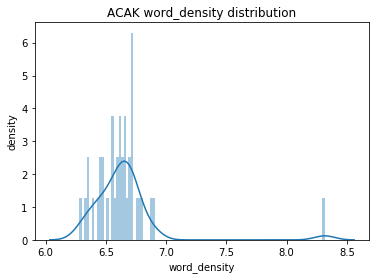

In [33]:
for i, category in enumerate(df_.category.unique()):
    _ = plt.figure(i)
    
    df_category = df_[df_.category == category]
    sns.distplot(df_category.word_density, bins = 100)
    #plt.xlim(0, 30000)#df_category.letter_lenght.max())
    plt.ylabel('density')
    plt.title(category + ' word_density distribution')
    
plt.show()

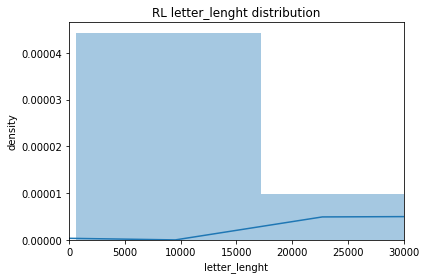

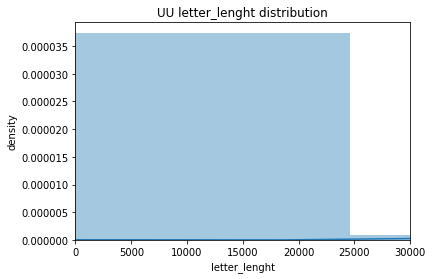

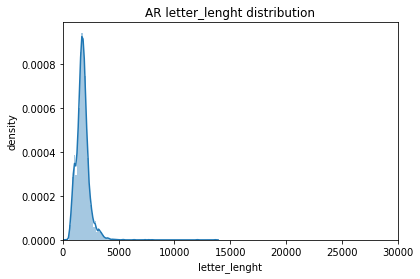

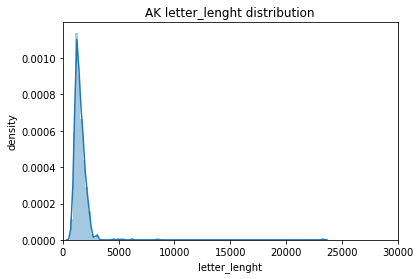

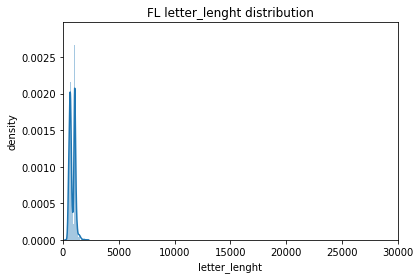

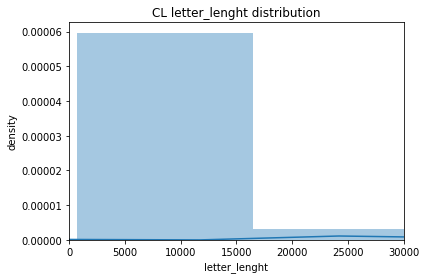

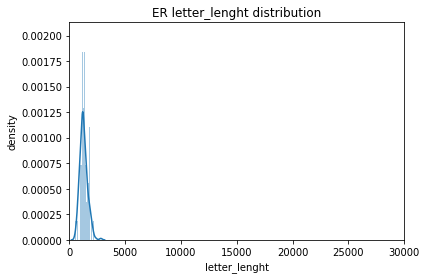

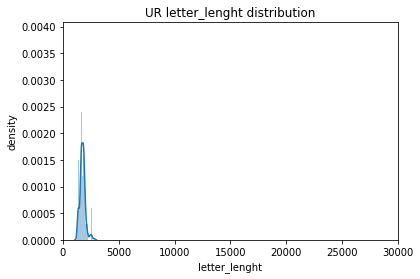

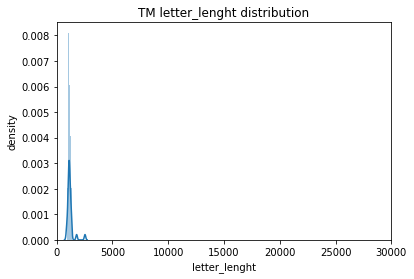

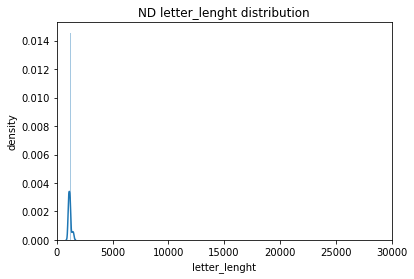

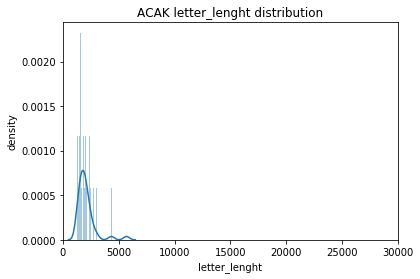

In [34]:
for i, category in enumerate(df_.category.unique()):
    _ = plt.figure(i)
    
    df_category = df_[df_.category == category]
    sns.distplot(df_category.letter_lenght, bins = 100)
    plt.xlim(0, 30000)#df_category.letter_lenght.max())
    plt.ylabel('density')
    plt.title(category + ' letter_lenght distribution')
    
plt.show()

si letter_lenght > 5000 solo puede ser RL, CL, UU y ACAK (aunque este ultimo mucho menos probable)

In [35]:
"""df_category = df_[df_.category == 'RL']
sns.distplot(df_category.letter_lenght, bins = 500)
plt.xlim(0, 100000)
plt.ylabel('density')
plt.title('letter_lenght distribution')

df_category = df_[df_.category == 'CL']
sns.distplot(df_category.letter_lenght, bins = 500)
plt.xlim(0, 100000)
plt.ylabel('density')
plt.title('letter_lenght distribution')"""

"df_category = df_[df_.category == 'RL']\nsns.distplot(df_category.letter_lenght, bins = 500)\nplt.xlim(0, 100000)\nplt.ylabel('density')\nplt.title('letter_lenght distribution')\n\ndf_category = df_[df_.category == 'CL']\nsns.distplot(df_category.letter_lenght, bins = 500)\nplt.xlim(0, 100000)\nplt.ylabel('density')\nplt.title('letter_lenght distribution')"

dejo a modo de ejemplo el codigo para ver como se superponen 2 distribuciones

In [36]:
"""
ya se dispone del dataframe y sus features intrínsecas.

grafico de como se distribuye cada feature intrinseca por cada categoria.
Las features intrinsics son:
- extension type (categorica)
- longitud de cartas (numerica)

========================================
en caso de extension type:
- eje X: categorias(CL,RL,etc) agrupadas por extension types(html, pdf, txt)
- eje Y: la cantidad de cartas que se corresponden con el eje X ( es decir, que se corresponde para tal extension type de tal categoria )
"""

'\nya se dispone del dataframe y sus features intrínsecas.\n\ngrafico de como se distribuye cada feature intrinseca por cada categoria.\nLas features intrinsics son:\n- extension type (categorica)\n- longitud de cartas (numerica)\n\n========================================\nen caso de extension type:\n- eje X: categorias(CL,RL,etc) agrupadas por extension types(html, pdf, txt)\n- eje Y: la cantidad de cartas que se corresponden con el eje X ( es decir, que se corresponde para tal extension type de tal categoria )\n'

In [37]:
df_cat_dummy = pd.DataFrame()
df_cat_dummy['file_type'] = np.zeros(len(df_.category.unique()))
df_cat_dummy.index = df_.category.unique()
df_cat_dummy

colors = []
for i in range(len(df_.category.unique())):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [38]:
def graph(filter_key, group_key, sort_key_value='category', 
          ylim_value=None, use_dummy_df=True, graph_colors=None,
          xlabel_value='', ylabel_value='', show_bar_values=False, maxnlocator=None):
    
    global colors
    
    for i, filter_key_value in enumerate(df_[filter_key].unique()):
        _ = plt.figure(i)

        df_filtered = df_[df_[filter_key] == filter_key_value]
        df_grouped = df_filtered.groupby(group_key).count()

        if use_dummy_df:
            #agrego categories que no estan 
            for i in range(0, len(df_cat_dummy)):
                item = df_cat_dummy.iloc[i]
                if item.name not in df_grouped.index:
                    df_grouped = df_grouped.append(item)

        df_grouped.sort_values(by=[sort_key_value], inplace=True)

        y = df_grouped.file_type
        x = df_grouped.index
        
        if ylim_value is not None:
            plt.ylim(0, ylim_value)

        if maxnlocator is not None:
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=maxnlocator))

        colors_list = []
        if graph_colors is None:
            colors_list = colors
        else:
            colors_list = graph_colors
        
        plt.bar(x, y, color=colors_list, tick_label=x)    
        plt.xlabel(xlabel_value)
        plt.ylabel(ylabel_value)
        plt.title(filter_key_value)
        
        if show_bar_values:
            total = df_grouped.file_type.sum()
            df_grouped['percentage'] = round(df_grouped.file_type / total * 100, 2)
            
            xlocs, xlabs = plt.xticks()
            for i, v in enumerate(y):
                y_value = df_grouped.percentage.iloc[i]
                plt.text(xlocs[i] - 0.5, v + 100, str(y_value)+'%')

    plt.show()

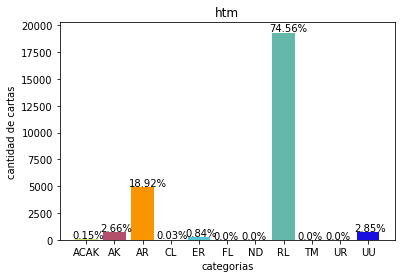

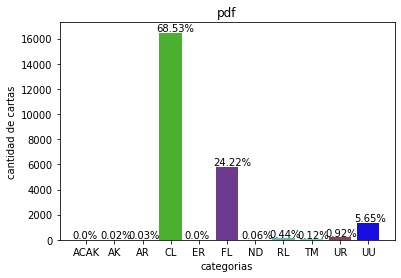

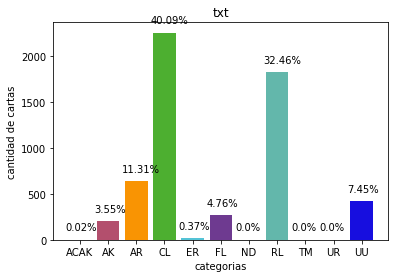

In [39]:
graph(filter_key='file_type', group_key='category', 
      show_bar_values=True,
      xlabel_value='categorias', ylabel_value='cantidad de cartas')

si es htm o pdf hay altas probabilidades de que sea RL o CL respectivamente

In [40]:
"""presencia de enums por categoria

data frame con categoria, total de cartas por categoria, cantidad de cartas con enumerado.

- eje X: categorías agrupadas por presencia de enum ( true o false )
- eje Y: cantidad de cartas que presentan enumerados
"""

'presencia de enums por categoria\n\ndata frame con categoria, total de cartas por categoria, cantidad de cartas con enumerado.\n\n- eje X: categorías agrupadas por presencia de enum ( true o false )\n- eje Y: cantidad de cartas que presentan enumerados\n'

In [41]:
load_feature('enumeration_presence')

load_feature('enumeration_count')

load_feature('enumeration_repeated')

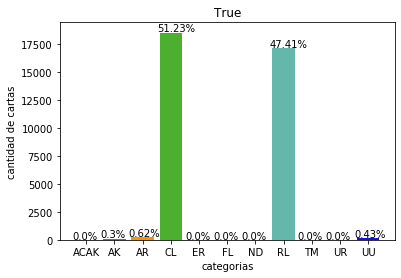

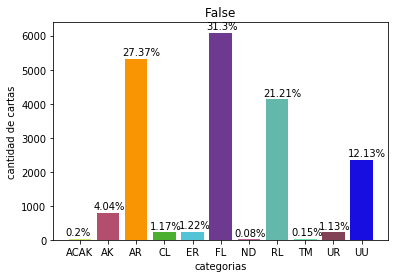

In [42]:
graph(filter_key='enumeration_presence', group_key='category', 
      xlabel_value='categorias', ylabel_value='cantidad de cartas', show_bar_values=True)

si tiene enumereado es muy probable que sea un carta tipo RL o CL

In [43]:
""" cantidad de enums por categoria

- eje X: cantidad de enumerados encontrados en una carta
- eje Y: cantidad de cartas de la categoria X que tienen tal cantidad de enumerados

"""

' cantidad de enums por categoria\n\n- eje X: cantidad de enumerados encontrados en una carta\n- eje Y: cantidad de cartas de la categoria X que tienen tal cantidad de enumerados\n\n'

<Figure size 432x288 with 0 Axes>

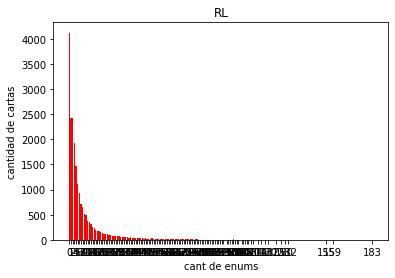

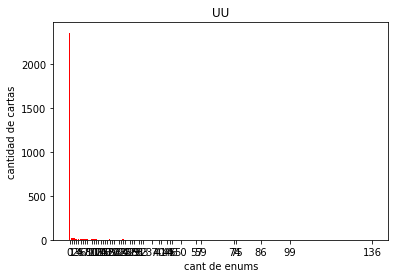

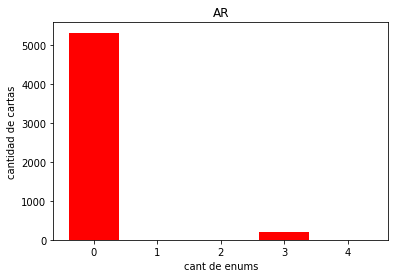

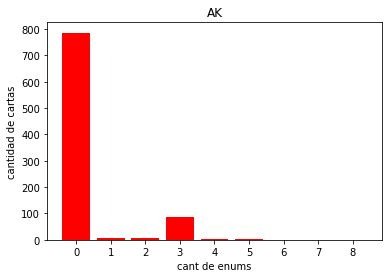

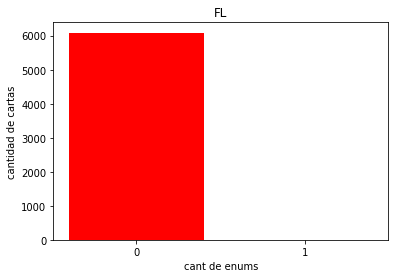

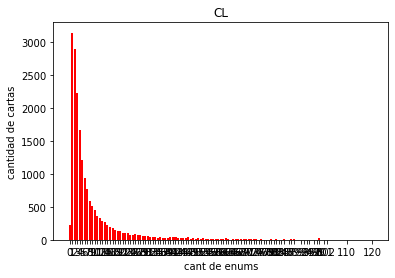

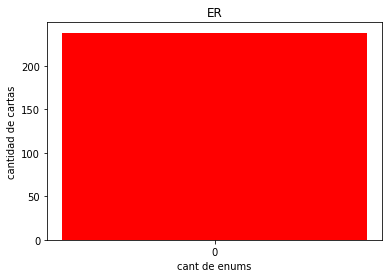

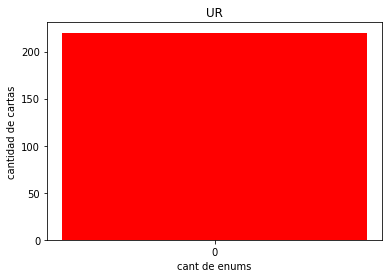

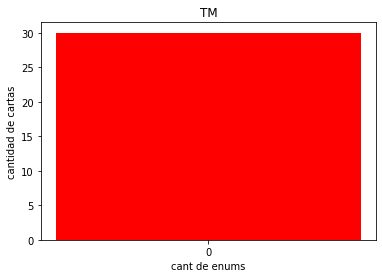

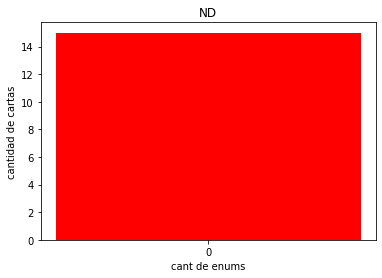

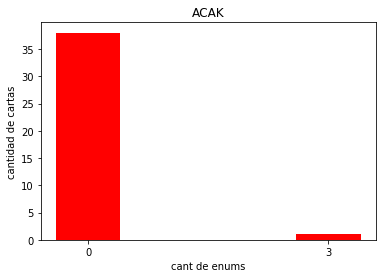

In [44]:
graph(filter_key='category', group_key='enumeration_count', sort_key_value='enumeration_count',
      maxnlocator = True, use_dummy_df=False, graph_colors=['red'],
      xlabel_value='cant de enums', ylabel_value='cantidad de cartas')

In [45]:
""" cantidad de enums duplicados por categoria

- eje X: categorias
- eje Y: cantidad de cartas de la categoria X que tienen enumerados repetidos

"""

' cantidad de enums duplicados por categoria\n\n- eje X: categorias\n- eje Y: cantidad de cartas de la categoria X que tienen enumerados repetidos\n\n'

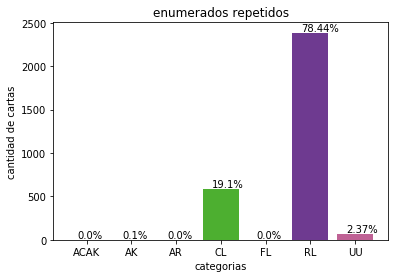

In [46]:
df_filtered = df_[df_.enumeration_presence == True]

dummy_cat_list = df_filtered.category.unique()

df_filtered = df_[df_.enumeration_repeated == True]

df_grouped = df_filtered.groupby('category').count()

#agrego categories que no estan y cumplen con -> enumeration_presence == True 
for i in range(0, len(dummy_cat_list)):
    dummy_cat = dummy_cat_list[i]
    if dummy_cat not in df_grouped.index:
        dummy_df = pd.DataFrame()
        dummy_df['category'] = [dummy_cat]
        dummy_df['file_type'] = [0]
        dummy_df.index = dummy_df.category
        del dummy_df['category']
        df_grouped = df_grouped.append(dummy_df, sort=True)

df_grouped.sort_values(by=['category'], inplace=True)

y = df_grouped.file_type
x = df_grouped.index
#plt.ylim(0, 10)

plt.bar(x, y, color=colors)    
plt.xlabel('categorias')
plt.ylabel('cantidad de cartas')
plt.title('enumerados repetidos')

total = df_grouped.file_type.sum()
df_grouped['percentage'] = round(df_grouped.file_type / total * 100, 2)
    
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    y_value = df_grouped.percentage.iloc[i]
    plt.text(xlocs[i] - 0.2, v + 20, str(y_value)+'%')

si tiene el enum repetido, hay altas probs de que sea RL o CL

In [47]:
""" presencia de encabezado de la SEC por categoria

data frame con id, tipo de categoria, presencia de encabezado SEC
- eje X: categorías agrupadas por presencia de enum ( true o false )
- eje Y: cantidad de cartas que presentan enumerados

"""

' presencia de encabezado de la SEC por categoria\n\ndata frame con id, tipo de categoria, presencia de encabezado SEC\n- eje X: categorías agrupadas por presencia de enum ( true o false )\n- eje Y: cantidad de cartas que presentan enumerados\n\n'

In [49]:
#SEC letters classification
################################

load_feature('sec_header_presence')

<Figure size 432x288 with 0 Axes>

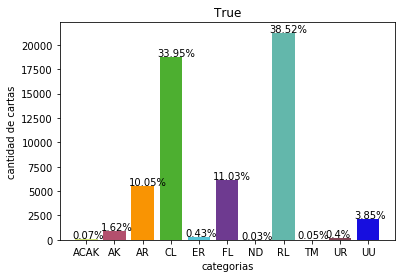

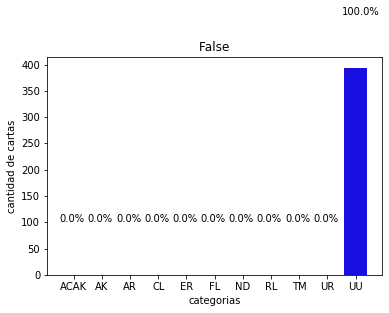

In [50]:
graph(filter_key='sec_header_presence', group_key='category', sort_key_value='category',
      maxnlocator = False, use_dummy_df=True, show_bar_values=True,
      xlabel_value='categorias', ylabel_value='cantidad de cartas')

In [51]:
"""data frame con id, tipo de categoria, presencia de patron

se hará un gráfico por cada patron
- eje X: categorías agrupadas por presencia de patron ( true o false )
- eje Y: cantidad de cartas que presentan el patron
"""

'data frame con id, tipo de categoria, presencia de patron\n\nse hará un gráfico por cada patron\n- eje X: categorías agrupadas por presencia de patron ( true o false )\n- eje Y: cantidad de cartas que presentan el patron\n'

In [52]:
#Response letters classification
################################

load_feature('response_presence')

<Figure size 432x288 with 0 Axes>

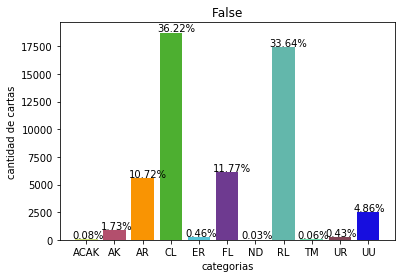

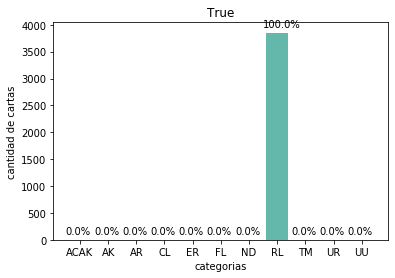

In [53]:
graph(filter_key='response_presence', group_key='category', sort_key_value='category',
      maxnlocator = False, use_dummy_df=True, show_bar_values=True,
      xlabel_value='categorias', ylabel_value='cantidad de cartas')

In [54]:
#Comment letters classification
################################

load_feature('cl_sentence_presence')

<Figure size 432x288 with 0 Axes>

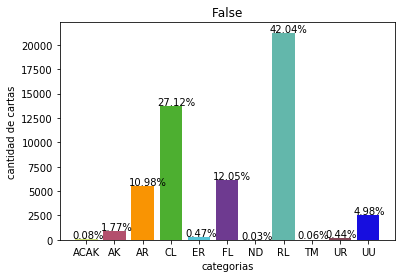

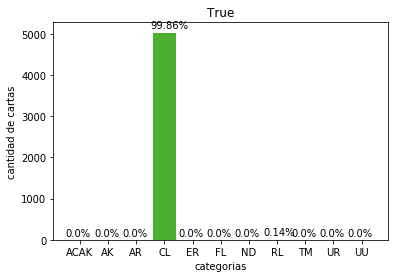

In [55]:
graph(filter_key='cl_sentence_presence', group_key='category', sort_key_value='category',
      maxnlocator = False, use_dummy_df=True, show_bar_values=True,
      xlabel_value='categorias', ylabel_value='cantidad de cartas')